In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
df=pd.read_csv('weatherAUS.csv')

In [91]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [93]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [94]:
df = df.drop(["Date", "Location", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)

In [95]:
num_cols=df.select_dtypes(include=np.number).columns
cat_cols=df.select_dtypes(include='object').columns

In [96]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [97]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [98]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\n Outliers removed using IQR method!")
print("New shape:", df.shape)


 Outliers removed using IQR method!
New shape: (104811, 17)


In [99]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104811 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        104811 non-null  float64
 1   MaxTemp        104811 non-null  float64
 2   Rainfall       104811 non-null  float64
 3   WindGustDir    104811 non-null  int64  
 4   WindGustSpeed  104811 non-null  float64
 5   WindDir9am     104811 non-null  int64  
 6   WindDir3pm     104811 non-null  int64  
 7   WindSpeed9am   104811 non-null  float64
 8   WindSpeed3pm   104811 non-null  float64
 9   Humidity9am    104811 non-null  float64
 10  Humidity3pm    104811 non-null  float64
 11  Pressure9am    104811 non-null  float64
 12  Pressure3pm    104811 non-null  float64
 13  Temp9am        104811 non-null  float64
 14  Temp3pm        104811 non-null  float64
 15  RainToday      104811 non-null  int64  
 16  RainTomorrow   104811 non-null  int64  
dtypes: float64(12), int64(5)
memory us

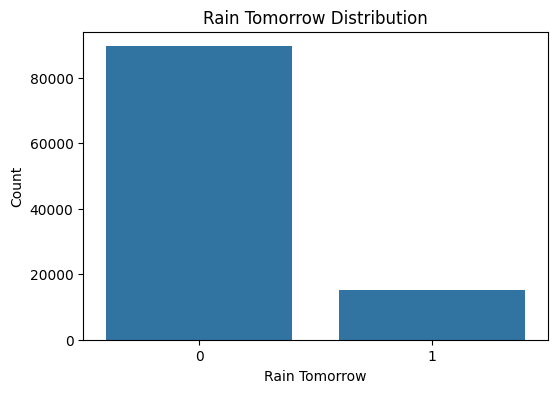

In [101]:
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=df)
plt.title("Rain Tomorrow Distribution")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count")
plt.show()


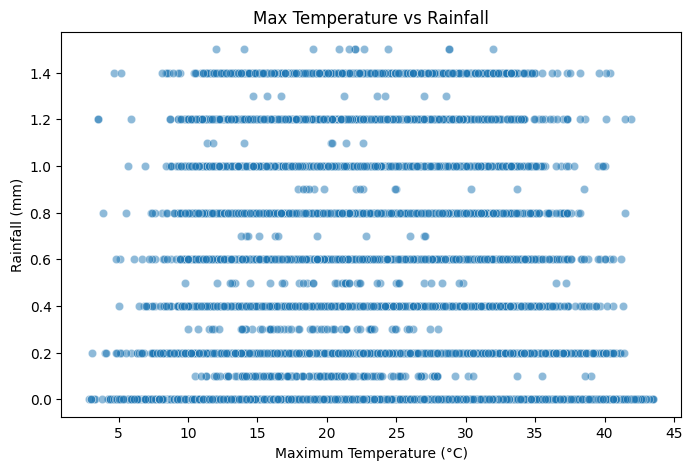

In [102]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df, alpha=0.5)
plt.title("Max Temperature vs Rainfall")
plt.xlabel("Maximum Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.show()

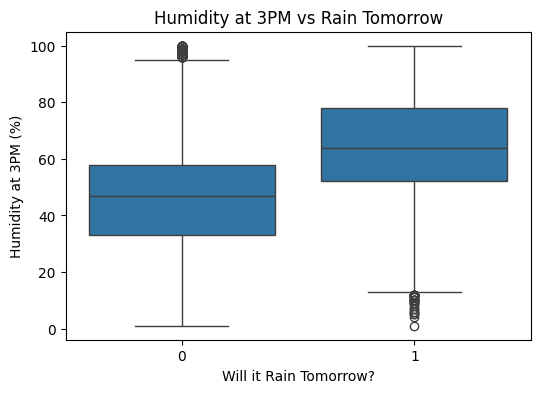

In [103]:
plt.figure(figsize=(6,4))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title("Humidity at 3PM vs Rain Tomorrow")
plt.xlabel("Will it Rain Tomorrow?")
plt.ylabel("Humidity at 3PM (%)")
plt.show()


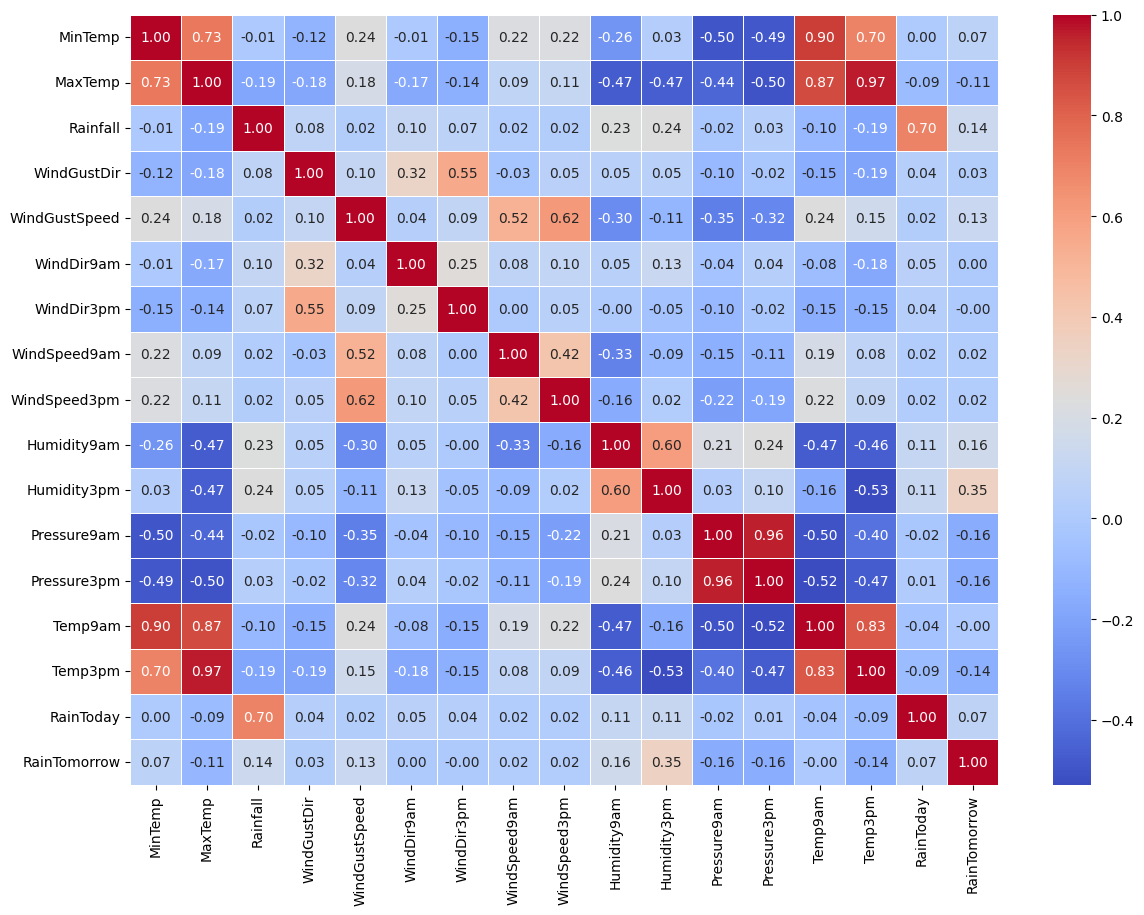

In [104]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

plt.figure(figsize=(14,10))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.show()


In [105]:
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [107]:
y_pred = model.predict(X_test)

print("\n Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Model Evaluation:
Accuracy: 87.9 %

Confusion Matrix:
 [[17626   229]
 [ 2307   801]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     17855
           1       0.78      0.26      0.39      3108

    accuracy                           0.88     20963
   macro avg       0.83      0.62      0.66     20963
weighted avg       0.87      0.88      0.85     20963

